# Load Library

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Progress bar
from tqdm import tqdm_notebook, trange

%matplotlib inline

In [2]:
# https://seaborn.pydata.org/generated/seaborn.set_style.html
sns.set_style('whitegrid')

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.set_context.html
sns.set_context('notebook')

# Basic

## 그래프 1개

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)
y = np.sin(x)

In [ ]:
plt.plot(x, y)

- Palette
  - http://colorbrewer2.org/
  - https://color.adobe.com/ko/explore/?filter=most-popular&time=month

### 속성 변경

In [ ]:
plt.plot(
    x, 
    y, 
    linestyle = '-', 
    marker    = 'o',
    color     = '#068587'
)

### 2종류 데이터

In [ ]:
x = np.linspace(-2*np.pi, 2*np.pi, 100)

y_sin = np.sin(x)
y_cos = np.cos(x)

### 범례(Legend)

In [ ]:
plt.plot(x, y_sin, 'o-', label=r'$\sin(x)$')    # $ $ 사이에는 TeX 문법을 넣을 수 있습니다.
plt.plot(x, y_cos, 'o-', label=r'$\cos(x)$')

plt.legend()

### 범례 위치

In [ ]:
plt.plot(x, y_sin, 'o-', label=r'$\sin(x)$')    # $ $ 사이에는 TeX 문법을 넣을 수 있습니다.
plt.plot(x, y_cos, 'o-', label=r'$\cos(x)$')

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc=1)

In [ ]:
plt.plot(x, y_sin, 'o-', label=r'$\sin(x)$')    # $ $ 사이에는 TeX 문법을 넣을 수 있습니다.
plt.plot(x, y_cos, 'o-', label=r'$\cos(x)$')

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

# 그래프 2개

In [ ]:
# plt.subplots(세로 개수, 가로 개수)
f, axarr = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

axarr[0].plot(x, y_sin, marker='o', linestyle='-')
axarr[0].set_title(r'$\sin(x)$')

axarr[1].plot(x, y_cos, marker='o', linestyle='-')
axarr[1].set_title(r'$\cos(x)$')

In [ ]:
def draw_subplot(ax, x, y, title):
    ax.plot(x, y, marker='o', linestyle='-')
    ax.set_title(title)


# plt.subplots(세로 개수, 가로 개수)
f, axarr = plt.subplots(1, 2, figsize=(12, 4), dpi=100)

draw_subplot(axarr[0], x, y_sin, r'$\sin(x)$')
draw_subplot(axarr[1], x, y_sin, r'$\cos(x)$')

# MNIST Loader

In [ ]:
def load_mnist(data_type='mnist', kind='train'):
    """MNIST Loader
    
    Args:
        data_type (str):
        kind (str):
        
    Returns:
        images (np.array):
        labels (np.array):
    
    Examples:
        >>> train_images, train_labels = load_mnist()
        >>> train_images, train_labels = load_mnist(data_type='fashion-mnist')
    """
    import os
    import gzip
    import urllib.parse
    
    import numpy as np
    import requests
    
    if data_type == 'mnist':
        BASE_URL = 'http://yann.lecun.com/exdb/mnist/'
    elif data_type == 'fashion-mnist':
        BASE_URL = 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/'
    else:
        BASE_URL = 'https://github.com/zalandoresearch/fashion-mnist/raw/master/data/fashion/'

    labels_url = urllib.parse.urljoin(BASE_URL, '%s-labels-idx1-ubyte.gz' % kind)
    images_url = urllib.parse.urljoin(BASE_URL, '%s-images-idx3-ubyte.gz' % kind)
    
    # Load MNIST data from `url`
    r_labels = requests.get(labels_url)
    r_images = requests.get(images_url)
    
    blabels = gzip.decompress(r_labels.content)
    labels  = np.frombuffer(blabels, dtype=np.uint8, offset=8)

    bimages = gzip.decompress(r_images.content)
    images  = (
        np.frombuffer(bimages, dtype=np.uint8, offset=16)
          .reshape(len(labels), 28, 28)
    )

    return images, labels

# MNIST Data
- https://en.wikipedia.org/wiki/MNIST_database

## Load images & labels

In [ ]:
train_images, train_labels = load_mnist(data_type='mnist', kind='train')

In [ ]:
train_images.shape

## Print image matrix
- Number padding
  - https://pyformat.info/

In [ ]:
for row in train_images[0]:
    joined_str = ' '.join(['{:3d}'.format(v) for v in row])
    print(joined_str)

## Random images

In [ ]:
# range of random_index = [0, len(reshaped_train_images))
random_index = np.random.randint(len(train_images))

plt.imshow(train_images[random_index])

## Change color map

- https://matplotlib.org/tutorials/colors/colormaps.html

In [ ]:
# range of random_index = [0, len(reshaped_train_images))
random_index = np.random.randint(len(train_images))

plt.imshow(train_images[random_index], cmap='gray')
plt.axis('off')

### Reversed color map

In [ ]:
# range of random_index = [0, len(reshaped_train_images))
random_index = np.random.randint(len(train_images))

plt.imshow(train_images[random_index], cmap='gray_r')
plt.axis('off')

## Random sample

In [ ]:
indexes = np.unique(np.random.choice(len(train_images), size=203))

In [ ]:
len(indexes)

In [ ]:
sampled_images = train_images[indexes]

## Multiple plots

In [ ]:
def draw_subplot(ax, img):
    ax.imshow(img, cmap='gray_r')
    ax.axis('off')
    

number_of_images = len(indexes)

n_cols = 10
n_rows = int(np.ceil(number_of_images / n_cols))

# Last row
remainder = number_of_images % n_cols


f, axarr = plt.subplots(n_rows, n_cols, figsize=(15,15), dpi=100)


for i in tqdm_notebook(range(number_of_images)):
    pos_y, pos_x = divmod(i, n_cols)
    draw_subplot(axarr[pos_y, pos_x], sampled_images[i])

for j in range(number_of_images, n_rows*n_cols):
    pos_y, pos_x = divmod(j, n_cols)
    axarr[pos_y, pos_x].axis('off')

# Fashion MNIST Data

## Load Data

In [ ]:
train_images, train_labels = load_mnist(data_type='fashion', kind='train')

## Random Sample

In [ ]:
indexes = np.unique(np.random.choice(len(train_images), size=203))

In [ ]:
sampled_images = train_images[indexes]

- Label info
  - https://github.com/zalandoresearch/fashion-mnist#labels

In [ ]:
sampled_labels = train_labels[indexes]

## Draw images

In [ ]:
def draw_subplot(ax, img, title):
    ax.set_title(title, fontsize=10)
    ax.imshow(img, cmap='gray_r')
    ax.axis('off')
    

number_of_images = len(indexes)

n_cols = 10
n_rows = int(np.ceil(number_of_images / n_cols))

# Last row
remainder = number_of_images % n_cols


f, axarr = plt.subplots(n_rows, n_cols, figsize=(15,15), dpi=100)


for i in tqdm_notebook(range(number_of_images)):
    pos_y, pos_x = divmod(i, n_cols)
    draw_subplot(axarr[pos_y, pos_x], sampled_images[i], sampled_labels[i])

for j in range(number_of_images, n_rows*n_cols):
    pos_y, pos_x = divmod(j, n_cols)
    axarr[pos_y, pos_x].axis('off')

# iris
- R. A. Fisher 의 붓꽃 데이터

## Load Data

In [3]:
df = pd.read_csv('http://danielykim.me/data/iris.csv')

In [6]:
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
colors = [colormap[x] for x in df['species']]

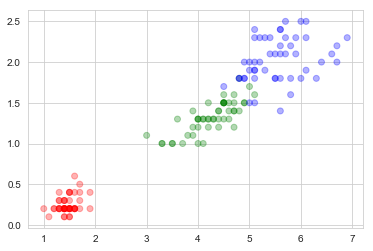

In [8]:
plt.scatter(df['petal_length'], df['petal_width'], c=colors, alpha=0.3)

## seaborn Pairplot
- https://seaborn.pydata.org/generated/seaborn.pairplot.html

C:\Users\clear\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


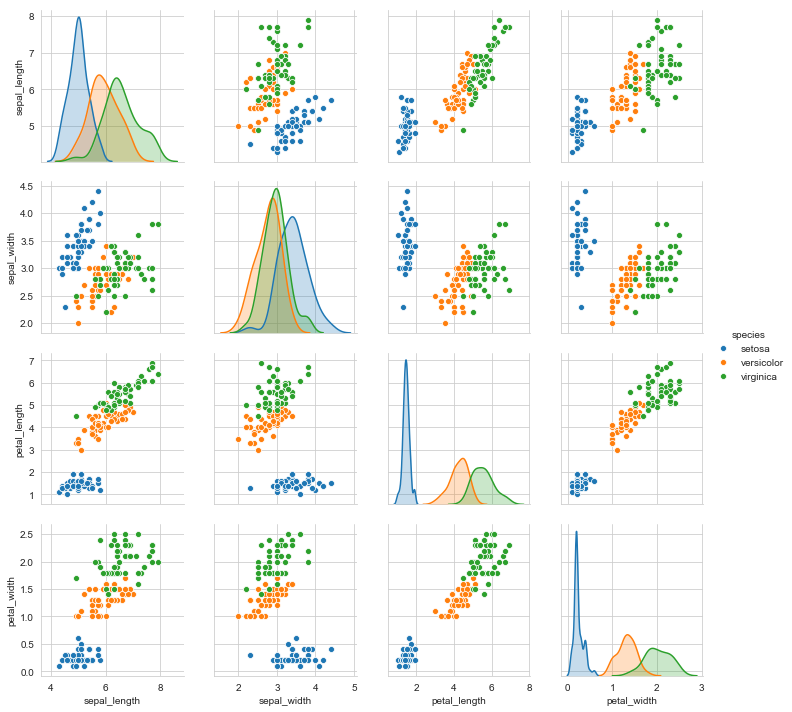

In [4]:
sns.pairplot(df, hue='species')

# 더 보기
- matplotlib pyplot official tutorial
  - https://matplotlib.org/tutorials/introductory/pyplot.html
- seaborn official tutorial
  - https://seaborn.pydata.org/tutorial.html
- Python reusable graph gallery
  - https://python-graph-gallery.com/